In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = input('choose a csv file: ') #fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv
y = input('choose a year to compare: ') #2015


df = pd.read_csv(str(x))
df = df.sort_values(by=['Date'])


df['Data_Value'] = df['Data_Value'] * 0.1
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['day'] = df['Date'].apply(lambda x: x[5:])
_0514 = df[(df['Year'] != str(y))]
_15 = df[df['Year'] == str(y)]


max_0514 = _0514.groupby('day').agg({'Data_Value':np.max})
min_0514 = _0514.groupby('day').agg({'Data_Value':np.min})
max_15 = _15.groupby('day').agg({'Data_Value':np.max})
min_15 = _15.groupby('day').agg({'Data_Value':np.min})
max_all = pd.merge(max_0514.reset_index(), max_15.reset_index(), on = 'day')
max_all.columns = ['day', '2005-2014','2015']

min_all = pd.merge(min_0514.reset_index(), min_15.reset_index(), on = 'day')
min_all.columns = ['day', '2005-2014','2015']

max_record_15 = max_all[max_all['2015'] > max_all['2005-2014']]
min_record_15 = min_all[min_all['2015'] < min_all['2005-2014']]


choose a csv file:  fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv
choose a year to compare:  2010


<ipython-input-112-e9671049f744>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axis = plt.axes()


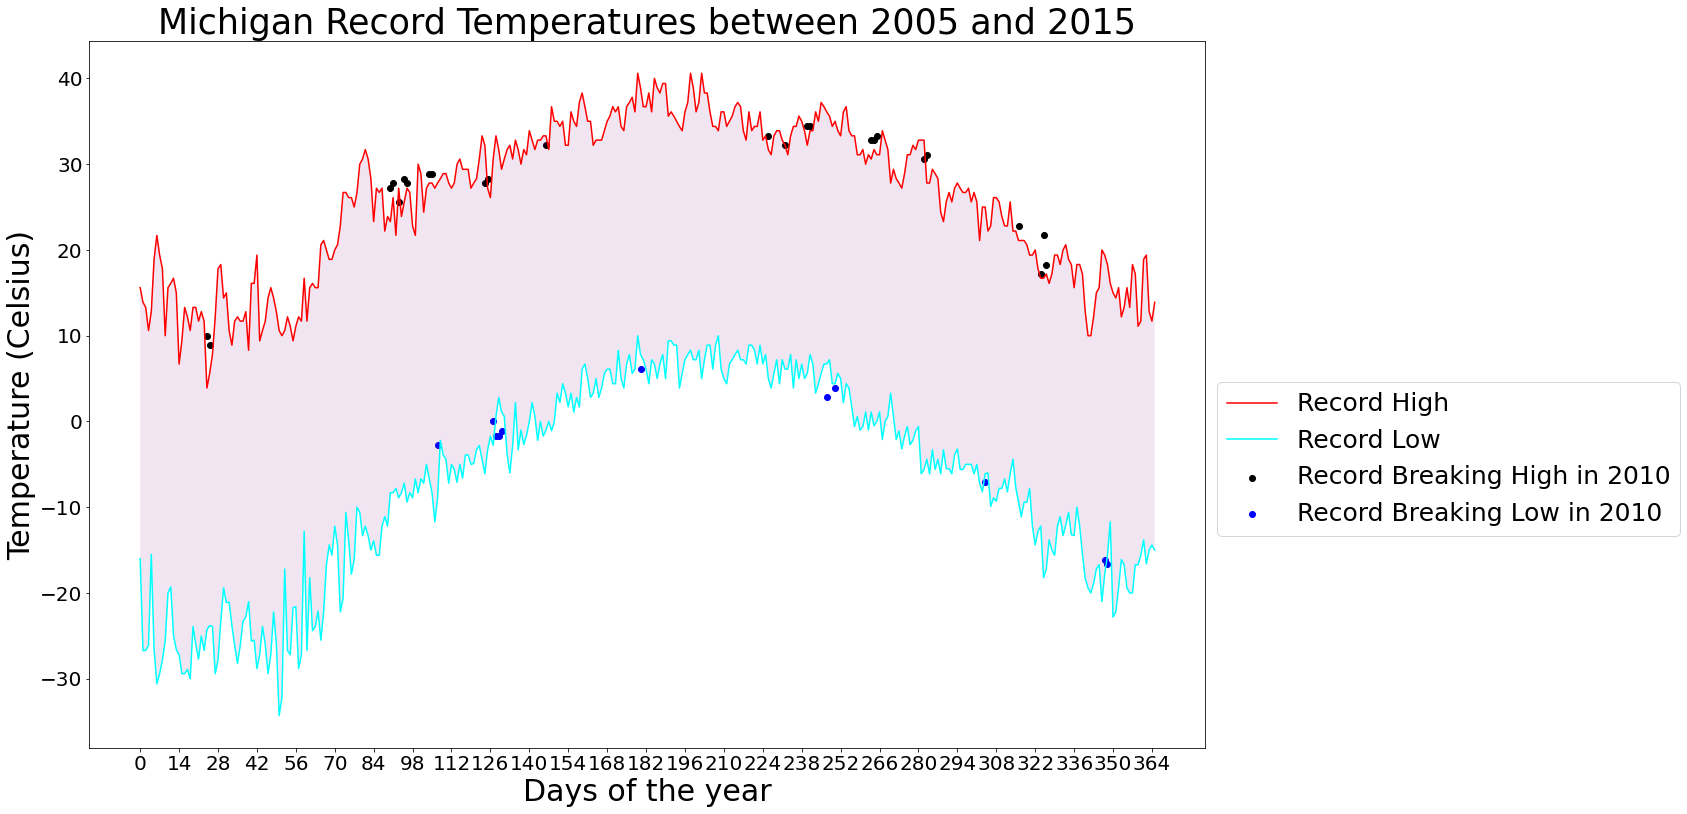

In [112]:
plt.figure(figsize=(20,13))

plt.plot(max_0514.values, 
         c = 'red', 
         label ='Record High')

plt.plot(min_0514.values, 
         c = '#00FFFF', 
         label ='Record Low')

plt.scatter(list(max_record_15.index), 
            max_record_15['2015'].values, 
            c = 'black', 
            label = "Record Breaking High in "+ str(y))

plt.scatter(list(min_record_15.index), 
            min_record_15['2015'].values, 
            c = 'blue', 
            label = "Record Breaking Low in " + str(y))

plt.xlabel('Days of the year', fontsize=30)
plt.ylabel('Temperature (Celsius)', fontsize=30)
plt.title('Michigan Record Temperatures between 2005 and 2015', fontsize=35)

plt.gca().fill_between(range(len(max_0514)), 
                       np.array(max_0514.values.reshape(len(max_0514),)), 
                       np.array(min_0514.values.reshape(len(min_0514.values),)), 
                       facecolor='purple', alpha=0.1)

DAYS = list(np.arange(0, 366, 14))
axis = plt.axes()
axis.set_xticks(DAYS)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = (1.01,0.3), fontsize=25)